<a href="https://colab.research.google.com/github/Vishakhatu/Capstone/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Convolutional Neural Networks (CNNs)

Convolutional Neural Networks (CNNs) are specialized for image and grid-like data processing. They use convolutional layers to detect local patterns such as edges and textures, followed by pooling layers to reduce dimensionality. CNNs excel in image recognition and computer vision tasks by capturing spatial hierarchies of features.

 **Install** **TensorFlow** **and** **Matplotlib**

In [ ]:
!pip install tensorflow matplotlib

**Import necessary libraries**

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

**Load and preprocess the CIFAR-10 dataset**

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

**Create a data loader**

In [ ]:
train_loader = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(32)

**Visualize some sample images**

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

def plot_sample_images(images, labels):
    plt.figure(figsize=(10, 10))
    for i in range(len(images)):
        plt.subplot(1, len(images), i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i])
        plt.xlabel(class_names[int(labels[i])])  # Ensure the label is an integer
    plt.show()

# Get a batch of sample images and labels
sample_images, sample_labels = next(iter(train_loader))
sample_images = sample_images.numpy()
sample_labels = tf.argmax(sample_labels, axis=1).numpy()

plot_sample_images(sample_images[:5], sample_labels[:5])

**Build the CNN model**

In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

**Compile the model**

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

**Train the model and store training history**

In [ ]:
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.2)


**Evaluate the model**

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc}')

**Plot the training and validation accuracy and loss**

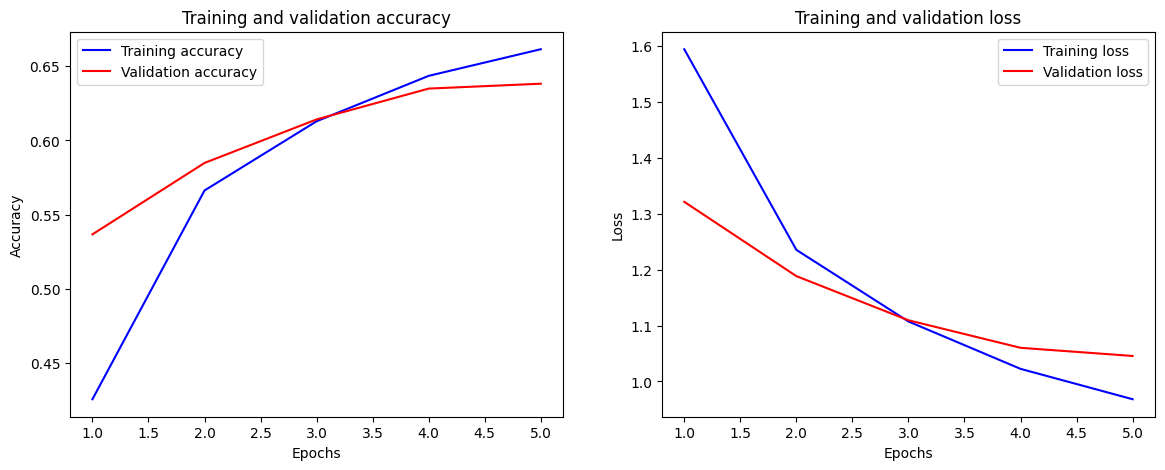

In [4]:
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(14, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'b', label='Training accuracy')
    plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

plot_history(history)
